In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
expense = pd.read_csv('Expenses.csv')
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15720 entries, 0 to 15719
Data columns (total 32 columns):
Employee ID                 15720 non-null int64
Report Name                 15681 non-null object
Report ID                   15681 non-null object
Transaction Date            15720 non-null object
Transaction Month Number    15720 non-null int64
Transaction Year            15720 non-null int64
Expense Type                15720 non-null object
Vendor                      15696 non-null object
Purpose                     14156 non-null object
Project                     15 non-null object
Payment Type                15720 non-null object
Reporting Currency          15720 non-null object
Expense Amount              15720 non-null object
Sent for Payment Date       10270 non-null object
Approval Status             15720 non-null object
Company                     15681 non-null object
Company Code                15681 non-null float64
Account Code                15421 non-null flo

In [22]:
expense['Allocated Expense Amount'] = pd.to_numeric(expense['Allocated Expense Amount'], errors='coerce')
expense['Expense Amount'] = pd.to_numeric(expense['Expense Amount'], errors= 'coerce')

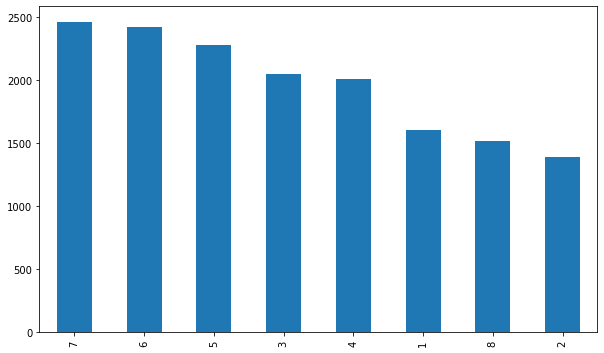

In [23]:
expense['Transaction Month Number'].value_counts().plot(kind='bar',figsize=(10,6))

In [24]:
expense['Employee ID'].value_counts()

2613     554
11071    274
10720    259
10499    243
7153     218
        ... 
8152       2
12801      2
7783       2
8072       1
5718       1
Name: Employee ID, Length: 271, dtype: int64

In [25]:
expense.loc[expense['Employee ID'] == 2613, 'Expense Amount'].sum()

156687.15999999997

In [26]:
expense.drop('Brand', axis=1, inplace=True)
expense.drop('Project', axis=1, inplace=True)
expense.drop('Supplier', axis=1, inplace=True)
expense.drop('Brand Code', axis=1, inplace=True)
expense.drop('Supplier Code', axis=1, inplace=True)

In [27]:
expense.head()

,Employee ID,Report Name,Report ID,Transaction Date,Transaction Month Number,Transaction Year,Expense Type,Vendor,Purpose,Payment Type,...,Location,Location Code,Division,Division Code,Team,Position,Cost Center Name,Cost Center,Reporting Currency.1,Allocated Expense Amount
0,5718,June Expenses (06/01/2021),39AD7B2AA6B94C96B27E,"Jun 9, 2021",6,2021,Parking,MP LINCOLN GARAGE LLC,NaN,American Express Corporate Card CBCP,...,Queens,5,SALES,2,Sales Queens,Sales Supervisor,Sales | Queens | Supervisor,21005,USD,13.52
1,11378,May 2021,1699541E4D2B4C01A5F7,"May 19, 2021",5,2021,Meals: Meals with Business Guest,LUCHARITOS,Reviewing nonbuys and discussing summer draft ...,American Express Corporate Card CBCP,...,Wyandanch,2,SALES,2,Sales Wyandanch,On Premise Sales Specialist,Sales | Wyandanch | On-Premise,20706,USD,50.97
2,11378,May 2021,1699541E4D2B4C01A5F7,"May 20, 2021",5,2021,Parking,PORT JEFFERSON VILLAGE,Meeting with several accounts in port Jefferson,American Express Corporate Card CBCP,...,Wyandanch,2,SALES,2,Sales Wyandanch,On Premise Sales Specialist,Sales | Wyandanch | On-Premise,20706,USD,2.00
3,11378,August Expenses (08/01/2021),473AA343D19A46BA90AD,"Aug 11, 2021",8,2021,Undefined,WATERZOOI PW,NaN,American Express Corporate Card CBCP,...,Wyandanch,2,SALES,2,Sales Wyandanch,On Premise Sales Specialist,Sales | Wyandanch | On-Premise,20706,USD,92.61
4,11378,August Expenses (08/01/2021),473AA343D19A46BA90AD,"Aug 18, 2021",8,2021,Undefined,CANZ,NaN,American Express Corporate Card CBCP,...,Wyandanch,2,SALES,2,Sales Wyandanch,On Premise Sales Specialist,Sales | Wyandanch | On-Premise,20706,USD,35.48


In [28]:
expense.columns

Index(['Employee ID', 'Report Name', 'Report ID', 'Transaction Date',
       'Transaction Month Number', 'Transaction Year', 'Expense Type',
       'Vendor', 'Purpose', 'Payment Type', 'Reporting Currency',
       'Expense Amount', 'Sent for Payment Date', 'Approval Status', 'Company',
       'Company Code', 'Account Code', 'Location', 'Location Code', 'Division',
       'Division Code', 'Team', 'Position', 'Cost Center Name', 'Cost Center',
       'Reporting Currency.1', 'Allocated Expense Amount'],
      dtype='object')

In [29]:
expense['Expense Type'].value_counts()

Fuel: Gasoline                                6876
Parking                                       2890
Communication: Mobile/Cellular Phone           925
Meals: Internal                                907
Tolls                                          598
                                              ... 
Fuel: Diesel                                     1
zNotUsed-Gifts - Clients                         1
Uniforms                                         1
Repairs and Maintenance: Computer and Tech       1
Car Rental                                       1
Name: Expense Type, Length: 77, dtype: int64

In [30]:
expense.loc[expense['Approval Status'] == 'Approved', 'Transaction Month Number'].value_counts()

3    1978
5    1928
4    1926
1    1556
2    1343
6    1279
7     260
Name: Transaction Month Number, dtype: int64

In [31]:
expense['Approval Status'].value_counts()

Approved                           10270
Approved & In Accounting Review     2680
Not Submitted                       2299
Submitted & Pending Approval         359
Sent Back to Employee                 73
Unassigned                            39
Name: Approval Status, dtype: int64

In [32]:
expense.loc[expense['Approval Status'] == 'Approved', 'Expense Amount'].sum()

689862.22

In [33]:
expense['Location'].value_counts()

Corporate    5926
Bronx        4355
Suffern      1975
Queens       1185
Wyandanch    1145
Brooklyn     1134
Name: Location, dtype: int64

In [34]:
expense.groupby(['Location'])[['Expense Amount']].sum().sort_values('Expense Amount')

,Expense Amount
Location,
Brooklyn,60721.87
Queens,66057.77
Wyandanch,76716.37
Suffern,115017.93
Bronx,213181.73
Corporate,537080.15


In [35]:
pd.DataFrame(expense['Division'].value_counts())

,Division
SALES,9582
WAREHOUSE,2317
G&A,1614
FLEET,851
DELIVERY,613
MARKETING,511
OCCUPANCY,193
REDEMPTION,39


In [36]:
expense.groupby(['Division'])[['Expense Amount']].sum().sort_values('Expense Amount')

,Expense Amount
Division,
REDEMPTION,2763.71
OCCUPANCY,6818.86
DELIVERY,28087.52
MARKETING,30250.85
WAREHOUSE,153465.63
FLEET,174310.69
G&A,183747.35
SALES,489331.21


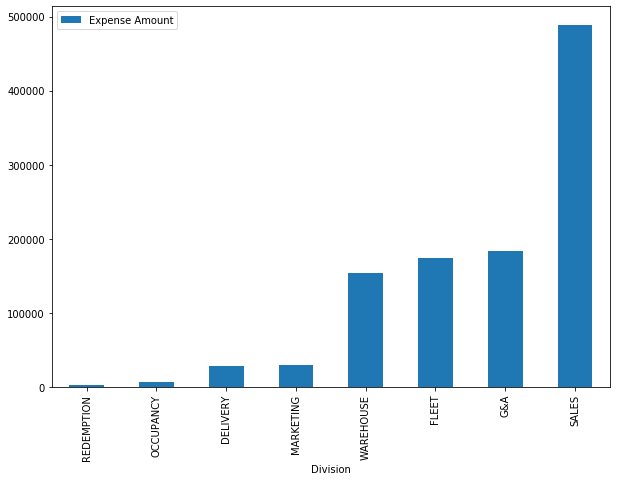

In [37]:
e = expense.groupby(['Division'])[['Expense Amount']].sum().sort_values('Expense Amount')
e.plot(kind='bar', figsize=(10,7))

In [38]:
expense['Position'].value_counts()

Sales Supervisor                      2277
Sales Manager                         1600
On Premise Sales Specialist           1412
Sales Specialist Wine & Spirits       1066
General Sales Director                 907
                                      ... 
Recruiting Coordinator                   7
Director Of Credit & Route Acct          6
Customer Service Assistant Manager       3
Maintenance Coordinator                  2
Sr Network Administrator                 1
Name: Position, Length: 82, dtype: int64

In [39]:
expense.groupby(['Position'])[['Expense Amount']].sum().sort_values('Expense Amount')

,Expense Amount
Position,
Maintenance Coordinator,68.01
Customer Service Assistant Manager,114.21
Recruiting Coordinator,122.99
Sr Network Administrator,125.00
Executive,139.70
...,...
General Sales Director,71293.72
Administrative Assistant,89049.43
Sales Manager,101850.72


In [41]:
expense['Expense Amount'].sum()

1068775.8199999998

In [42]:
expense['Allocated Expense Amount'].sum()

1069993.8

In [53]:
v = pd.DataFrame(expense[['Employee ID', 'Report Name', 'Report ID', 'Transaction Date',
       'Transaction Month Number', 'Transaction Year', 'Expense Type',
       'Vendor', 'Purpose', 'Payment Type', 'Reporting Currency',
       'Expense Amount']])

In [55]:
v.head()

,Employee ID,Report Name,Report ID,Transaction Date,Transaction Month Number,Transaction Year,Expense Type,Vendor,Purpose,Payment Type,Reporting Currency,Expense Amount
0,5718,June Expenses (06/01/2021),39AD7B2AA6B94C96B27E,"Jun 9, 2021",6,2021,Parking,MP LINCOLN GARAGE LLC,NaN,American Express Corporate Card CBCP,USD,13.52
1,11378,May 2021,1699541E4D2B4C01A5F7,"May 19, 2021",5,2021,Meals: Meals with Business Guest,LUCHARITOS,Reviewing nonbuys and discussing summer draft ...,American Express Corporate Card CBCP,USD,50.97
2,11378,May 2021,1699541E4D2B4C01A5F7,"May 20, 2021",5,2021,Parking,PORT JEFFERSON VILLAGE,Meeting with several accounts in port Jefferson,American Express Corporate Card CBCP,USD,2.00
3,11378,August Expenses (08/01/2021),473AA343D19A46BA90AD,"Aug 11, 2021",8,2021,Undefined,WATERZOOI PW,NaN,American Express Corporate Card CBCP,USD,92.61
4,11378,August Expenses (08/01/2021),473AA343D19A46BA90AD,"Aug 18, 2021",8,2021,Undefined,CANZ,NaN,American Express Corporate Card CBCP,USD,35.48
